# End-to-end Machine Learning project

The best way to learning any programming language or new concept is to do hands-on on that. Let's start with buidling machine learning model

## Problem Statement

Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.

## Dataset

Dataset is based on data from the 1990 California census. It is located at `datasets/housing/housing.csv`

# Get the data

In [1]:
import pandas as pd
import os

HOUSING_PATH = 'datasets/housing/'
def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)

In [2]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. 
There are 10 attributes:
longitude, 
latitude, 
housing_median_age, 
total_rooms, 
total_bedrooms, 
population,
households, 
median_income, 
median_house_value and 
ocean_proximity


In [3]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset.

Notice that the total_bedrooms attribute has only 20,433 non null values, meaning that 207 districts are missing this feature.

All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any
kind of Python object, but since you loaded this data from a CSV file you know that it must be a text
attribute. 

When you looked at the top five rows, you probably noticed that the values in that column were
repetitive, which means that it is probably a categorical attribute.

In [4]:
# Find out what categories exist
# and how many districts belong to each category by using the value_counts() method

housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# Let's look at the other fields.
# The describe() method shows a summary of the numerical attributes

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min and max rows are self-explanatory.

Note the count of total_bedrooms is 20,433, not 20,640. It means that null values are ignored

**std** rows shows the standard deviation (which measures how dispersed the values are)

** 25%, 50%, 75% ** shows the corresponding percentiles

** Points to Note**

1. ** 25th percentile is called 1st quartile ** - 25% of the districts have a housing_median_age lower than 18. 
2. ** 50th percentile is called median ** - 50% of the districts have a housing_median_age lower than 29. 
3. ** 75th percentile is called 3rd quartile ** - 75% of the districts have a housing_median_age lower than 37. 

## Go back to slide - Plot histogram

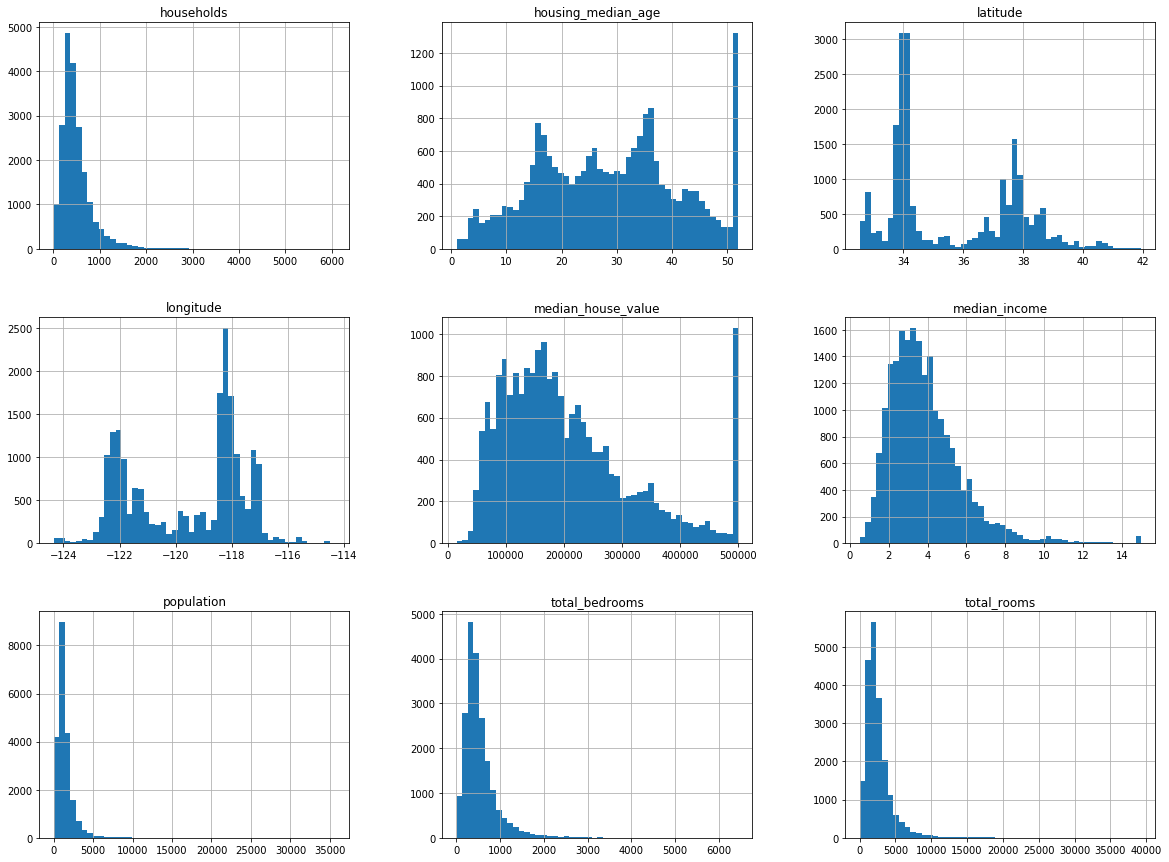

In [6]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Refer to slide [Things to Note in Histogram]

In [7]:
# To make this notebook's output identical at every run

import numpy as np

np.random.seed(42)

In [8]:
# For illustration only. Sklearn has train_test_split()

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [9]:
# With unique and immutable identifier

import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

print(len(train_set), "train +", len(test_set), "test")

16362 train + 4278 test


In [10]:
# Combining latitude and longitude into an ID

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

print(len(train_set), "train +", len(test_set), "test")

test_set.head()


16267 train + 4373 test


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [11]:
# With sklearn train_test_split

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(len(train_set), "train +", len(test_set), "test")

test_set.head()

16512 train + 4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


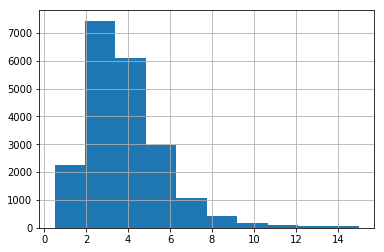

In [12]:
# Create a histrogram of median income

housing["median_income"].hist()

In [13]:
# Divide by 1.5 to limit the number of income categories
# Round up using ceil to have discrete categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)


# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] > 5, 5.0, inplace=True)


In [14]:
housing["income_cat"].value_counts()

5.0     19701
6.0       532
7.0       189
8.0       105
9.0        50
11.0       49
10.0       14
Name: income_cat, dtype: int64

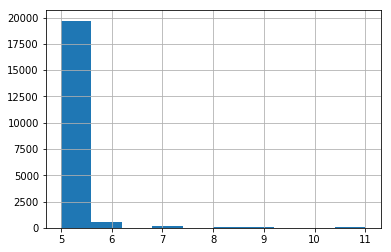

In [15]:
housing["income_cat"].hist()

In [16]:
# Stratified Sampling using Scikit-learn's StratifiedShuffleSplit Class

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
# Income category proportion in test set generated with stratified sampling

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

5.0     0.954457
6.0     0.025678
7.0     0.009205
8.0     0.005087
11.0    0.002422
9.0     0.002422
10.0    0.000727
Name: income_cat, dtype: float64

In [18]:
# Income category proportion in full dataset

housing["income_cat"].value_counts() / len(housing)

5.0     0.954506
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: income_cat, dtype: float64

In [19]:
# Let’s compare income category proportion in Stratified Sampling and Random Sampling

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [20]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
5.0,0.954506,0.955426,0.954457,0.096442,-0.005076
6.0,0.025775,0.024709,0.025678,-4.135338,-0.375940
7.0,0.009157,0.008721,0.009205,-4.761905,0.529101
8.0,0.005087,0.005572,0.005087,9.523810,0.000000
9.0,0.002422,0.002665,0.002422,10.000000,0.000000
10.0,0.000678,0.000969,0.000727,42.857143,7.142857
11.0,0.002374,0.001938,0.002422,-18.367347,2.040816


In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [22]:
housing = strat_train_set.copy()

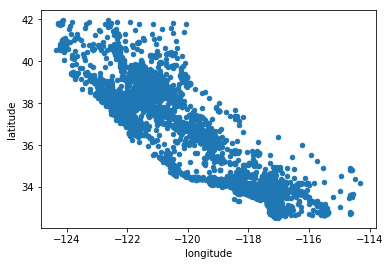

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude")

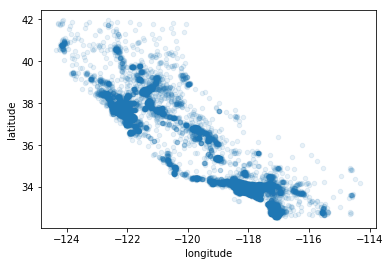

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611). Thanks to Wilmer Arellano for pointing it out.

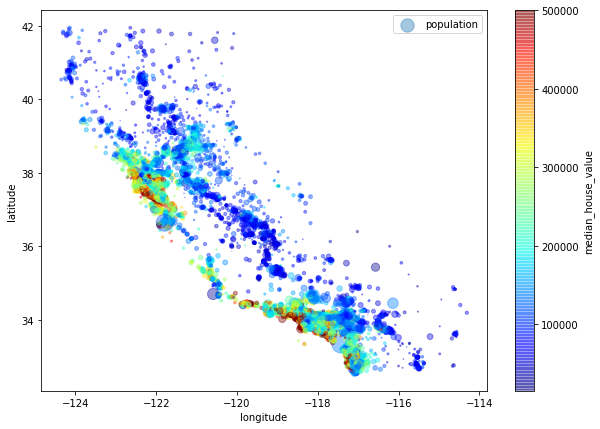

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

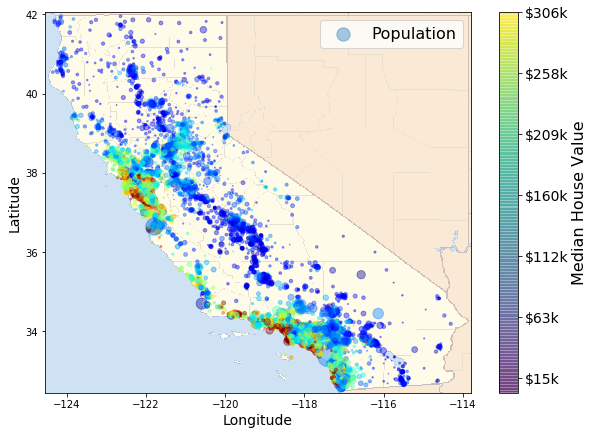

In [26]:
import matplotlib.image as mpimg
california_img=mpimg.imread('images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [27]:
corr_matrix = housing.corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686214
total_rooms           0.132777
housing_median_age    0.104035
households            0.065741
total_bedrooms        0.050092
population           -0.024797
longitude            -0.050312
latitude             -0.140169
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdea02fab70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fde835c7588>]], dtype=object)

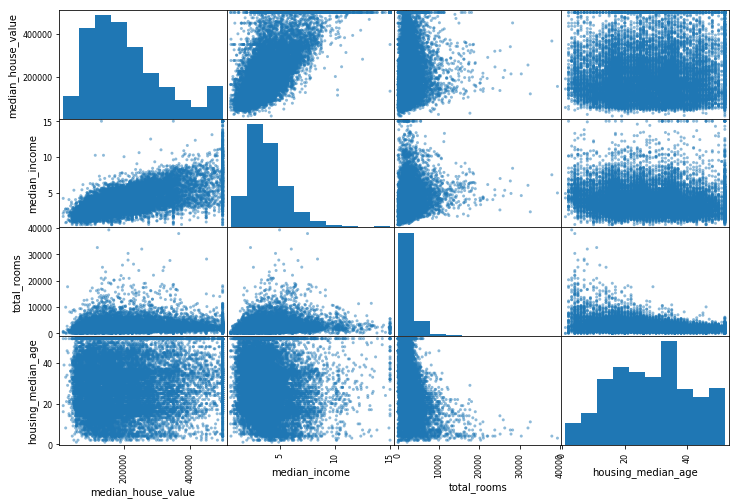

In [29]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

[0, 16, 0, 550000]

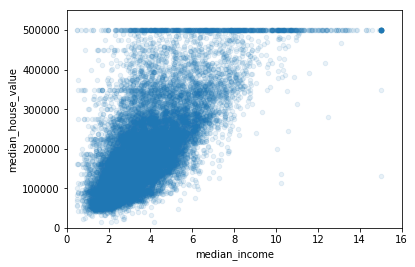

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [31]:
# Experimenting with Attribute Combinations

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
16659,-120.67,35.30,32.0,4202.0,986.0,2309.0,956.0,2.2165,231700.0,NEAR OCEAN,4.395397,0.234650,2.415272
19735,-121.80,40.34,26.0,4815.0,910.0,1341.0,539.0,2.8810,79800.0,INLAND,8.933210,0.188993,2.487941
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,<1H OCEAN,22.222222,0.100000,2.777778
16430,-121.35,38.09,32.0,1706.0,292.0,923.0,284.0,5.5057,147200.0,INLAND,6.007042,0.171161,3.250000
9111,-118.15,34.59,33.0,2111.0,429.0,1067.0,397.0,3.7344,111400.0,INLAND,5.317380,0.203221,2.687657


In [32]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686214
rooms_per_household         0.158915
total_rooms                 0.132777
housing_median_age          0.104035
households                  0.065741
total_bedrooms              0.050092
population_per_household   -0.020748
population                 -0.024797
longitude                  -0.050312
latitude                   -0.140169
bedrooms_per_room          -0.253415
Name: median_house_value, dtype: float64

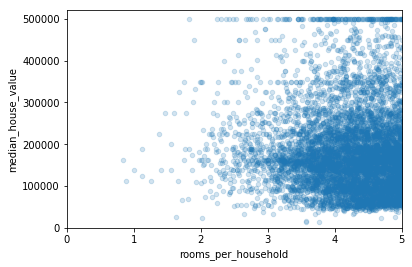

In [33]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [34]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16346.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16346.000000,16512.000000
mean,-119.567739,35.625042,28.620094,2642.931928,539.535605,1429.702701,501.295845,3.870025,207520.656856,5.410695,0.213137,3.063977
std,2.003392,2.130721,12.616845,2198.599417,424.418242,1155.262146,385.924073,1.900115,115669.426606,2.247741,0.058339,10.630931
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,786.750000,280.000000,2.565175,120400.000000,4.438383,0.175608,2.429911
50%,-118.490000,34.255000,29.000000,2125.000000,433.500000,1165.000000,409.000000,3.529600,181100.000000,5.226550,0.203183,2.816872
75%,-118.010000,37.710000,37.000000,3156.000000,648.000000,1726.000000,606.000000,4.740050,265600.000000,6.047952,0.239476,3.278569
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,132.533333,1.000000,1243.333333


# Prepare the data for Machine Learning algorithms

In [35]:
# Let’s revert to a clean training set

housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

# Note drop() creates a copy of the data and does not affect strat_train_set

In [36]:
# Let’s experiment with sample dataset for data cleaning

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6421,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,INLAND
7547,-118.20,33.92,45.0,1283.0,NaN,1025.0,248.0,3.2798,<1H OCEAN
9622,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,INLAND
16105,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN
3778,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN


In [37]:
# Option one
# dropna() - drops the missing values

sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [38]:
# Option two
# drop() - drops the attribute

sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
6421,-117.99,34.14,30.0,2346.0,1988.0,474.0,2.5625,INLAND
7547,-118.20,33.92,45.0,1283.0,1025.0,248.0,3.2798,<1H OCEAN
9622,-120.32,37.29,38.0,576.0,478.0,112.0,2.3382,INLAND
16105,-122.50,37.75,44.0,1819.0,1137.0,354.0,3.4919,NEAR OCEAN
3778,-118.40,34.17,24.0,6347.0,2945.0,1492.0,3.3545,<1H OCEAN


In [39]:
# Option three
# fillna() - sets the missing values
# Let’s fill the missing values with the median

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6421,-117.99,34.14,30.0,2346.0,433.5,1988.0,474.0,2.5625,INLAND
7547,-118.20,33.92,45.0,1283.0,433.5,1025.0,248.0,3.2798,<1H OCEAN
9622,-120.32,37.29,38.0,576.0,433.5,478.0,112.0,2.3382,INLAND
16105,-122.50,37.75,44.0,1819.0,433.5,1137.0,354.0,3.4919,NEAR OCEAN
3778,-118.40,34.17,24.0,6347.0,433.5,2945.0,1492.0,3.3545,<1H OCEAN


In [40]:
# Let's use Scikit-Learn Imputer class to fill missing values

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [41]:
# Remove the text attribute because median can only be calculated on numerical attributes

housing_num = housing.drop('ocean_proximity', axis=1)

In [42]:
# Fit the imputer instance to the training data

imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [43]:
imputer.statistics_

array([ -118.49  ,    34.255 ,    29.    ,  2125.    ,   433.5   ,
        1165.    ,   409.    ,     3.5296])

Transform the training set:

In [44]:
X = imputer.transform(housing_num)
X

array([[ -1.20670000e+02,   3.53000000e+01,   3.20000000e+01, ...,
          2.30900000e+03,   9.56000000e+02,   2.21650000e+00],
       [ -1.21800000e+02,   4.03400000e+01,   2.60000000e+01, ...,
          1.34100000e+03,   5.39000000e+02,   2.88100000e+00],
       [ -1.21960000e+02,   3.77400000e+01,   2.00000000e+00, ...,
          2.50000000e+01,   9.00000000e+00,   1.50001000e+01],
       ..., 
       [ -1.21880000e+02,   3.74400000e+01,   1.70000000e+01, ...,
          1.02800000e+03,   2.93000000e+02,   5.27220000e+00],
       [ -1.18290000e+02,   3.39800000e+01,   4.60000000e+01, ...,
          7.86000000e+02,   2.54000000e+02,   1.40420000e+00],
       [ -1.20830000e+02,   3.77700000e+01,   2.00000000e+01, ...,
          1.06200000e+03,   4.01000000e+02,   1.67590000e+00]])

In [45]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-120.67,35.30,32.0,4202.0,986.0,2309.0,956.0,2.2165
1,-121.80,40.34,26.0,4815.0,910.0,1341.0,539.0,2.8810
2,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001
3,-121.35,38.09,32.0,1706.0,292.0,923.0,284.0,5.5057
4,-118.15,34.59,33.0,2111.0,429.0,1067.0,397.0,3.7344


Now let's preprocess the categorical input feature, `ocean_proximity`:

In [46]:
# Convert ocean_proximity to numbers

housing_cat = housing['ocean_proximity']
housing_cat.head(10)

16659    NEAR OCEAN
19735        INLAND
1566      <1H OCEAN
16430        INLAND
9111         INLAND
4803      <1H OCEAN
6711      <1H OCEAN
10229     <1H OCEAN
19327     <1H OCEAN
10519     <1H OCEAN
Name: ocean_proximity, dtype: object

In [47]:
# Pandas factorize() example

df = pd.DataFrame({
        'A':['type1','type3','type3', 'type2', 'type0']
    })
df['A'].factorize()

(array([0, 1, 1, 2, 3]),
 Index(['type1', 'type3', 'type2', 'type0'], dtype='object'))

In [48]:
# Convert ocean_proximity to numbers
# Use Pandas factorize()


housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 2, 1, 1, 2, 2, 2, 2, 2])

In [49]:
# Check encoding classes

housing_categories

Index(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [50]:
# We can convert each categorical value to a one-hot vector using a `OneHotEncoder`
# Note that fit_transform() expects a 2D array
# but housing_cat_encoded is a 1D array, so we need to reshape it

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [51]:
# The OneHotEncoder returns a sparse array by default, but we can convert it to a dense array if needed

housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [52]:
# Just run this cell, or copy it to your code, do not try to understand it (yet).
# Definition of the CategoricalEncoder class, copied from PR #9151.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [53]:
# The CategoricalEncoder expects a 2D array containing one or more categorical input features. 
# We need to reshape `housing_cat` to a 2D array:

cat_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

Let's create a custom transformer to add extra attributes:

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-120.67,35.3,32,4202,986,2309,956,2.2165,NEAR OCEAN,4.3954,2.41527
1,-121.8,40.34,26,4815,910,1341,539,2.881,INLAND,8.93321,2.48794
2,-121.96,37.74,2,200,20,25,9,15.0001,<1H OCEAN,22.2222,2.77778
3,-121.35,38.09,32,1706,292,923,284,5.5057,INLAND,6.00704,3.25
4,-118.15,34.59,33,2111,429,1067,397,3.7344,INLAND,5.31738,2.68766


In [57]:
# Feature Scaling - Min-max Scaling - Example
# Creating DataFrame first

s1 = pd.Series([1, 2, 3, 4, 5, 6], index=(range(6)))
s2 = pd.Series([10, 9, 8, 7, 6, 5], index=(range(6)))
df = pd.DataFrame(s1, columns=['s1'])
df['s2'] = s2
df 


,s1,s2
0,1,10
1,2,9
2,3,8
3,4,7
4,5,6
5,6,5


In [58]:
# Use Scikit-Learn minmax_scaling

from mlxtend.preprocessing import minmax_scaling
minmax_scaling(df, columns=['s1', 's2'])


,s1,s2
0,0.0,1.0
1,0.2,0.8
2,0.4,0.6
3,0.6,0.4
4,0.8,0.2
5,1.0,0.0


In [59]:
# Now let's build a pipeline for preprocessing the numerical attributes:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [60]:
housing_num_tr

array([[ -5.50214296e-01,  -1.52554734e-01,   2.67896442e-01, ...,
         -4.51710498e-01,  -6.10223676e-02,   3.09900007e-01],
       [ -1.11427484e+00,   2.21291300e+00,  -2.07672665e-01, ...,
          1.56718270e+00,  -5.41865727e-02,  -3.74804330e-01],
       [ -1.19414182e+00,   9.92632026e-01,  -2.10994909e+00, ...,
          7.47952462e+00,  -2.69221759e-02,  -1.70938890e+00],
       ..., 
       [ -1.15420833e+00,   8.51830375e-01,  -9.21026325e-01, ...,
          5.41573976e-02,   4.18184423e-02,  -4.42869058e-01],
       [  6.37807022e-01,  -7.72081998e-01,   1.37755769e+00, ...,
         -4.48962183e-01,   2.87013483e-03,   8.15076251e-01],
       [ -6.30081275e-01,   1.00671219e+00,  -6.83241772e-01, ...,
         -5.02252533e-01,  -3.90944534e-02,   3.10822893e-01]])

And a transformer to just select a subset of the Pandas DataFrame columns:

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [62]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [63]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [64]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.5502143 , -0.15255473,  0.26789644, ...,  0.        ,
         0.        ,  1.        ],
       [-1.11427484,  2.212913  , -0.20767267, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19414182,  0.99263203, -2.10994909, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-1.15420833,  0.85183037, -0.92102633, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63780702, -0.772082  ,  1.37755769, ...,  0.        ,
         0.        ,  0.        ],
       [-0.63008128,  1.00671219, -0.68324177, ...,  0.        ,
         0.        ,  0.        ]])

In [65]:
housing_prepared.shape

(16512, 16)

# Select and train a model 

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# let's try the full pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 225989.71413576   96191.57304408  649275.29155898  220219.32439295
  168294.67538466]


Compare against the actual values:

In [68]:
print("Labels:", list(some_labels))

Labels: [231700.0, 79800.0, 350000.0, 147200.0, 111400.0]


In [69]:
some_data_prepared

array([[-0.5502143 , -0.15255473,  0.26789644,  0.70914022,  1.0594968 ,
         0.76114666,  1.17825748, -0.87025017, -0.4517105 , -0.06102237,
         0.30990001,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-1.11427484,  2.212913  , -0.20767267,  0.98796253,  0.87957214,
        -0.07678377,  0.09770133, -0.52052389,  1.5671827 , -0.05418657,
        -0.37480433,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.19414182,  0.99263203, -2.10994909, -1.11116463, -1.22744037,
        -1.21595366, -1.27566739,  5.85775702,  7.47952462, -0.02692218,
        -1.7093889 ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.88964896,  1.15690062,  0.26789644, -0.42616235, -0.58349947,
        -0.43861737, -0.56307041,  0.86085541,  0.26531756,  0.01749882,
        -0.64222476,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.70769063, -0.48578531,  0

In [70]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68744.721630362168

In [71]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49610.100142295996

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [73]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [75]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 73457.63643519  69486.94281194  72160.46998288  69131.92890659
  71606.76353816  69456.90911052  67530.23763703  67592.98239084
  68244.23571515  68737.34563427]
Mean: 69740.5452163
Standard deviation: 1908.23448432


In [76]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 76500.81429098  67303.19524308  71615.63063351  69931.48479511
  66762.1526088   69843.36057843  65866.8368432   70421.95959386
  64289.14603427  68620.49581086]
Mean: 69115.5076432
Standard deviation: 3265.13699207


In [77]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [78]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21983.851629119697

In [79]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 56138.44687088  53494.00000022  54315.20800972  53004.98642917
  51207.79594632  54317.63069432  49782.26913154  49587.02225058
  49236.06380424  53912.25946336]
Mean: 52499.56826
Standard deviation: 2264.26921019


In [80]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69115.507643
std       3441.756589
min      64289.146034
25%      66897.413267
50%      69231.928195
75%      70299.340894
max      76500.814291
dtype: float64

In [81]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110963.21724329064

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

The best hyperparameter combination found:

In [83]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [84]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [85]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64235.0248069 {'max_features': 2, 'n_estimators': 3}
55395.8713167 {'max_features': 2, 'n_estimators': 10}
52994.2257555 {'max_features': 2, 'n_estimators': 30}
59119.0211557 {'max_features': 4, 'n_estimators': 3}
52163.5227223 {'max_features': 4, 'n_estimators': 10}
49925.5027794 {'max_features': 4, 'n_estimators': 30}
58662.9260136 {'max_features': 6, 'n_estimators': 3}
51987.0659941 {'max_features': 6, 'n_estimators': 10}
49818.9816904 {'max_features': 6, 'n_estimators': 30}
58844.4078945 {'max_features': 8, 'n_estimators': 3}
52192.3252472 {'max_features': 8, 'n_estimators': 10}
49829.9184918 {'max_features': 8, 'n_estimators': 30}
61942.5042858 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54452.7631517 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59266.076001 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52518.681941 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58943.7724424 {'bootstrap': False, 'max_features': 4, 'n_estimat

In [86]:
pd.DataFrame(grid_search.cv_results_)

/usr/local/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/a

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.062891,0.003134,-4.126138e+09,-1.118501e+09,NaN,2,3,"{'max_features': 2, 'n_estimators': 3}",18,-4.558260e+09,...,-4.104118e+09,-1.170119e+09,-3.770690e+09,-1.054659e+09,-4.159220e+09,-1.134496e+09,0.001099,0.000030,2.539244e+08,3.760274e+07
1,0.206276,0.009097,-3.068703e+09,-5.757229e+08,NaN,2,10,"{'max_features': 2, 'n_estimators': 10}",11,-3.363137e+09,...,-3.018836e+09,-5.862504e+08,-2.981990e+09,-5.774069e+08,-2.819866e+09,-5.706045e+08,0.002581,0.000212,1.826920e+08,6.464039e+06
2,0.622136,0.030949,-2.808388e+09,-4.335716e+08,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",9,-3.036333e+09,...,-2.755092e+09,-4.430157e+08,-2.726157e+09,-4.339856e+08,-2.550870e+09,-4.411656e+08,0.003393,0.000548,1.761255e+08,7.797187e+06
3,0.105182,0.003126,-3.495059e+09,-9.652744e+08,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",15,-3.506532e+09,...,-3.648688e+09,-1.013825e+09,-3.230017e+09,-9.314004e+08,-3.270475e+09,-9.376995e+08,0.001285,0.000019,2.234586e+08,3.008020e+07
4,0.344612,0.009198,-2.721033e+09,-5.132266e+08,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",6,-2.853370e+09,...,-2.693374e+09,-5.218345e+08,-2.596959e+09,-5.046094e+08,-2.525194e+09,-5.076282e+08,0.001650,0.000230,1.538255e+08,7.397283e+06
5,1.028864,0.030976,-2.492556e+09,-3.837388e+08,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",3,-2.695185e+09,...,-2.451235e+09,-3.888378e+08,-2.391694e+09,-3.831306e+08,-2.251564e+09,-3.859673e+08,0.003223,0.000251,1.694553e+08,4.120213e+06
6,0.141352,0.003137,-3.441339e+09,-9.057197e+08,NaN,6,3,"{'max_features': 6, 'n_estimators': 3}",12,-3.419922e+09,...,-3.384377e+09,-9.400286e+08,-3.257626e+09,-9.329013e+08,-3.585589e+09,-8.842819e+08,0.001343,0.000017,1.201147e+08,3.319397e+07
7,0.480035,0.009748,-2.702655e+09,-4.867554e+08,NaN,6,10,"{'max_features': 6, 'n_estimators': 10}",5,-2.895735e+09,...,-2.649092e+09,-4.914817e+08,-2.519219e+09,-4.957612e+08,-2.557206e+09,-4.704238e+08,0.003935,0.000580,1.617258e+08,1.041228e+07
8,1.456810,0.031337,-2.481931e+09,-3.770674e+08,NaN,6,30,"{'max_features': 6, 'n_estimators': 30}",1,-2.749341e+09,...,-2.428967e+09,-3.830178e+08,-2.293007e+09,-3.804535e+08,-2.275266e+09,-3.789919e+08,0.013251,0.000612,1.926080e+08,4.786605e+06
9,0.186530,0.003154,-3.462664e+09,-9.309199e+08,NaN,8,3,"{'max_features': 8, 'n_estimators': 3}",13,-3.550141e+09,...,-3.343372e+09,-9.563786e+08,-3.325615e+09,-9.243171e+08,-3.440462e+09,-9.323330e+08,0.001319,0.000033,1.246088e+08,1.391929e+07


In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fde7803d358>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fde7803de48>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [88]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49068.3883355 {'max_features': 7, 'n_estimators': 180}
51573.057453 {'max_features': 5, 'n_estimators': 15}
50463.9048295 {'max_features': 3, 'n_estimators': 72}
50865.6848397 {'max_features': 5, 'n_estimators': 21}
49229.4622878 {'max_features': 7, 'n_estimators': 122}
50454.2742067 {'max_features': 3, 'n_estimators': 75}
50331.3987643 {'max_features': 3, 'n_estimators': 88}
49583.3697605 {'max_features': 5, 'n_estimators': 100}
50205.4951149 {'max_features': 3, 'n_estimators': 150}
64681.2730808 {'max_features': 5, 'n_estimators': 2}


In [89]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.55237555e-02,   7.17153329e-02,   4.15673985e-02,
         1.84353424e-02,   1.66336235e-02,   1.71875511e-02,
         1.59640894e-02,   3.21579587e-01,   4.81744377e-02,
         1.08527540e-01,   9.68451139e-02,   7.99319984e-03,
         1.52203550e-01,   6.37298896e-05,   2.81788851e-03,
         4.76786079e-03])

In [90]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32157958673305248, 'median_income'),
 (0.15220354969507827, 'INLAND'),
 (0.10852753962772481, 'pop_per_hhold'),
 (0.096845113887646814, 'bedrooms_per_room'),
 (0.075523755454848449, 'longitude'),
 (0.071715332905303575, 'latitude'),
 (0.048174437735227074, 'rooms_per_hhold'),
 (0.041567398529766229, 'housing_median_age'),
 (0.018435342394086274, 'total_rooms'),
 (0.017187551122008246, 'population'),
 (0.016633623451520498, 'total_bedrooms'),
 (0.015964089434623085, 'households'),
 (0.0079931998397881291, '<1H OCEAN'),
 (0.0047678607920448399, 'NEAR OCEAN'),
 (0.0028178885077265281, 'NEAR BAY'),
 (6.3729889554675972e-05, 'ISLAND')]

In [91]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [92]:
final_rmse

48746.339821791356

Congratulations! You already know quite a lot about Machine Learning. :)